# A Song of Ice and Fire
## Challenge
There are approximately 2,000 characters in A Song of Ice and Fire by George R.R. Martin.
This book series was the inspiration for the HBO series Game of Thrones.
Your tasks as a future master of analytics are to predict which characters in the series will live or die, and give data-driven recommendations on how to survive in Game of Thrones.

## Assignment Tasks:
- Engineer features
- Develop machine learning algorithms
- Test and cross-validate models
- Predict on new observations
- Summarize the problem and your results

## Deliverables

### No 1
Analysis Write Up
- Summarize the problem
- Present key insights that are actionable
- Offer implementation recommendations
- Maximum of 2 pages double-spaced (A.P.A format)

### No 2
Data Analysis and Analysis Code
- Tell the story of your analysis through:
 - exploratory data analysis
 - feature treatment and engineering
 - utilizing appropriate modeling techniques
- Code should:
 - be well commented
 - follow PEP 8 guidelines (see myCourses for more details)
 - avoid “data dumping” (i.e. avoid any unnecessary output)
 - run without errors
 - be submitted as a .py script
 
### No 3
Final Model and Model Code
- Model will be assessed on:
 - AUC value on unseen data (randomly seeded)
 - appropriateness for the problem at hand
- Code should:
 - be well commented
 - follow PEP 8 guidelines (see myCourses for more details)
 - run without errors
 - be submitted as a .py script
 
## Data
Data File: GOT_character_predictions.xlsx

Data Dictionary: GOT_data_dictionary.xlsx

## Dictionary

| Feature | Description |
|---|---|
|S.No	|Character number (by order of appearance)|
|name	|Character name|
|title	|Honorary title(s) given to each character|
|male	|1 = male, 0 = female|
|culture	|Indicates the cultural group of a character|
|dateOfBirth	|Known dates of birth for each character (measurement unknown)|
|mother	|Character's biological mother|
|father	|Character's biological father|
|heir	|Character's biological heir|
|house	|Indicates a character's allegiance to a house (i.e. a powerful family)|
|spouse	|Character's spouse(s)|
|book1_A_Game_Of_Thrones	|1 = appeared in book, 0 = did not appear in book|
|book2_A_Clash_Of_Kings	|1 = appeared in book, 0 = did not appear in book|
|book3_A_Storm_Of_Swords	|1 = appeared in book, 0 = did not appear in book|
|book4_A_Feast_For_Crows	|1 = appeared in book, 0 = did not appear in book|
|book5_A_Dance_with_Dragons	|1 = appeared in book, 0 = did not appear in book|
|isAliveMother	|1 = alive, 0 = not alive|
|isAliveFather	|1 = alive, 0 = not alive|
|isAliveHeir	|1 = alive, 0 = not alive|
|isAliveSpouse	|1 = alive, 0 = not alive|
|isMarried	|1 = married, 0 = not married|
|isNoble	|1 = noble, 0 = not noble|
|age	|Character's age in years|
|numDeadRelations	|Total number of deceased relatives throughout all of the books|
|popularity	|Indicates the popularity of a character (1 = extremely popular (max), 0 = extremely unpopular (min))|
|isAlive	|1 = alive, 0 = not alive!|

# Imports

In [271]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np
from itertools import compress
%matplotlib inline

In [272]:
# prep
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [274]:
# other models
import xgboost as xgb

In [275]:
# metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import shap

# Data exploration and cleaning

In [276]:
data_file = "GOT_character_predictions.xlsx"
GOT_Data = pd.read_excel(data_file)

In [277]:
GOT_Data.head()

,S.No,name,title,male,culture,dateOfBirth,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1739,Imry Florent,Ser,1,NaN,NaN,NaN,NaN,NaN,House Florent,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.183946,0
1,1233,Merianne Frey,NaN,0,NaN,288.0,NaN,NaN,NaN,House Frey,...,NaN,NaN,NaN,NaN,0,0,17.0,0,0.083612,1
2,998,Dolf,NaN,0,Vale mountain clans,NaN,NaN,NaN,NaN,Stone Crows,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.016722,1
3,64,Quill,NaN,1,Braavosi,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.016722,1
4,334,Bandy,NaN,0,Northmen,NaN,NaN,NaN,NaN,House Stark,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.020067,1


In [278]:
GOT_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 26 columns):
S.No                          1946 non-null int64
name                          1946 non-null object
title                         938 non-null object
male                          1946 non-null int64
culture                       677 non-null object
dateOfBirth                   433 non-null float64
mother                        21 non-null object
father                        26 non-null object
heir                          23 non-null object
house                         1519 non-null object
spouse                        276 non-null object
book1_A_Game_Of_Thrones       1946 non-null int64
book2_A_Clash_Of_Kings        1946 non-null int64
book3_A_Storm_Of_Swords       1946 non-null int64
book4_A_Feast_For_Crows       1946 non-null int64
book5_A_Dance_with_Dragons    1946 non-null int64
isAliveMother                 21 non-null float64
isAliveFather                 26 non-null f

In [279]:
data = GOT_Data

## title

There are to many titles - consolidate into groups and keep only groups with more than 15 entries.
NAs will be treated as people without title and put into the group none

In [280]:
data['title'].value_counts()

Ser                                                            384
Maester                                                         39
Archmaester                                                     21
Lord                                                            20
Septon                                                          18
Winterfell                                                      17
Princess                                                        16
Lady                                                            12
Septa                                                           10
King in the North                                                9
Lord Commander of the Night's Watch                              9
Prince                                                           9
Grand Maester                                                    8
Cupbearer                                                        8
Khal                                                          

In [281]:
data['title'] = data['title'].fillna('none')
# keep only lower case
data['title'] = data['title'].apply(lambda x: x.lower())
# keep only letters
data['title'] = data['title'].apply(lambda x: re.sub('[^a-z]+', ' ', x))

In [282]:
keepStr = ['none',
           'ser',
           'lord',
           'maester',
           'royal',
           'septa',
           'winterfell',
           'lady',
           'princess',
           'archmaester',
           'king',
           'prince',
           'septon',
           'master']
# keep only the items listed regardless of where in the string they occur
data['title'] = data['title'].apply(lambda x:\
                                    list(compress(keepStr,\
                                                  list(substring in x for substring in keepStr)))[0]\
                                    if (any(substring in x for substring in keepStr))\
                                    else 'other')

In [283]:
# remove gender as contained seperately
data['title'] = data['title'].replace({'lady':'lord',
                                       'princess':'prince',
                                       'septon':'sept',
                                       'septa':'sept',
                                       'master':'maester'})

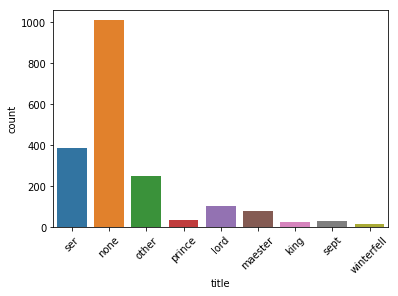

In [345]:
sns.countplot(x = 'title',
              data = data);
plt.xticks(rotation = 45);
plt.savefig('Title Counts.png')
plt.show()

In [285]:
dummies = pd.get_dummies(list(data['title']),
                         drop_first = True)
dummies = dummies.add_prefix('tit_')
data = pd.concat(
        [data.loc[:,:],
         dummies],
         axis = 1)

## male

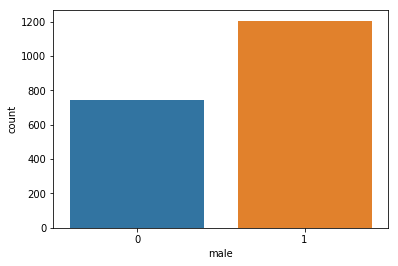

In [286]:
sns.countplot(x = 'male',
              data = data);

## culture

In [287]:
data['culture'] = data['culture'].fillna('none')

In [288]:
data['culture'].value_counts().head(20)

none                   1269
Northmen                124
Ironborn                112
Free Folk                51
Valyrian                 43
Braavosi                 42
Dornish                  25
Ghiscari                 25
Dothraki                 23
Valemen                  19
Rivermen                 19
Reach                    16
Vale mountain clans      15
Dornishmen               14
Westeros                 12
Free folk                11
Westerman                 9
northmen                  9
Stormlands                7
Tyroshi                   7
Name: culture, dtype: int64

In [289]:
data['culture'] = data['culture'].str.lower()

In [290]:
data['culture'] = data['culture'].replace({'vale mountain clans':'valemen',
                                           'westerman':'westeros',
                                           'westermen':'westeros',
                                           'dornishmen':'dornish',
                                           'dorne':'dornish',
                                           'northern mountain clans':'northmen',
                                           'the north':'northmen',
                                           'westerlands':'westeros',
                                           'riverlands':'rivermen',
                                           'vale':'valemen',
                                           'westermen':'westeros',
                                           'westerosi':'westeros',
                                           'the reach':'reach',
                                           'reachmen':'reach',
                                           'braavos':'braavosi',
                                           'ironmen':'ironborn',
                                           'ghiscaricari':'ghiscari',
                                           'ghis':'ghiscari',
                                           'summer islander':'summer islands',
                                           'summer isles':'summer islands',
                                           "asshai'i":'asshai',
                                           'lyseni':'lysene',
                                           'andals':'andal',
                                           'myrmen':'myrish',
                                           'myr':'myrmen',
                                           'stormlands':'stormlander',
                                           'norvos':'norvoshi',
                                           'first men':'free folk',
                                           'wildling':'free folk',
                                           'qartheen':'qarth',
                                           'the reach':'reach',
                                           'reachmen':'reach'
                                          })

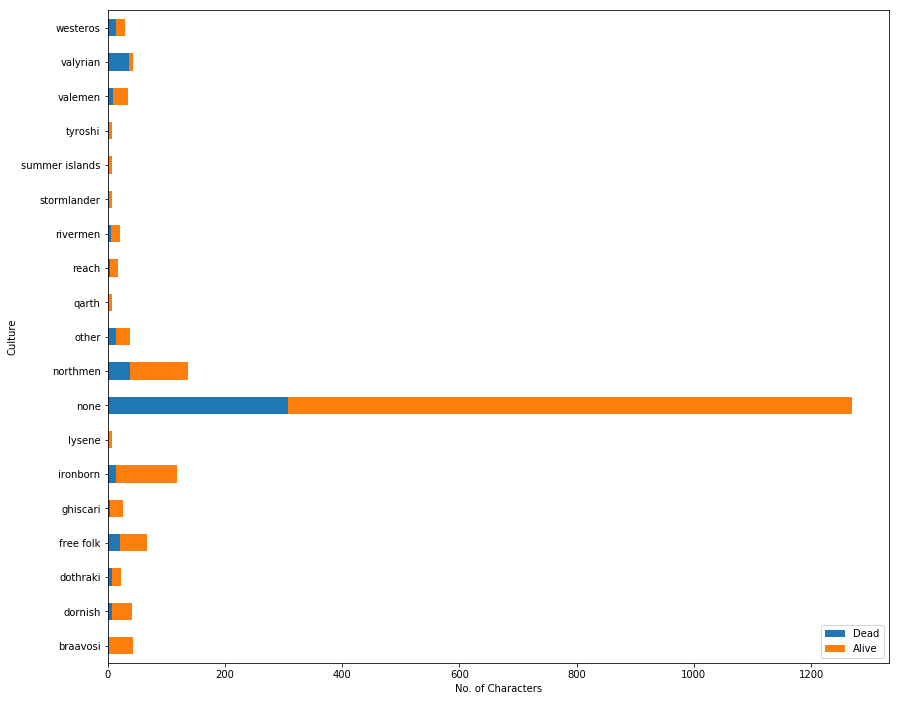

In [343]:
d = data.groupby(["culture", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
d.loc[:, "total"] = data.sum(axis = 1)
p = d[d.index != ""].sort_values("total")[[0, 1]].plot.barh(stacked = True,
                                                            rot = 0,
                                                            figsize = (14, 12),)
_ = p.set(xlabel = "No. of Characters",
          ylabel = "Culture"),
p.legend(["Dead", "Alive"],
         loc = "lower right")
plt.savefig('Culture Alive.png')
plt.show()

In [292]:
keepStr = data['culture'].value_counts().head(18)
data['culture'] = data['culture'].apply(lambda x: x if x in keepStr else 'other')

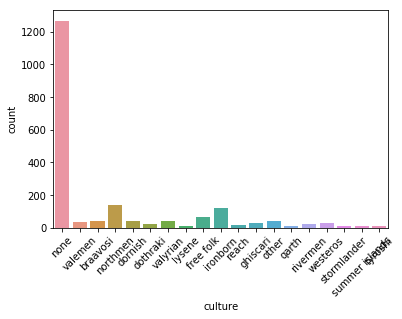

In [344]:
sns.countplot(x = 'culture',
              data = data);
plt.xticks(rotation = 45);
plt.savefig('Culture counts.png')
plt.show()

Needs encoding

In [294]:
maria = pd.get_dummies(list(data['culture']),
                       drop_first = True)
maria = dummies.add_prefix('cul_')
data = pd.concat(
        [data.loc[:,:],
         maria],
         axis = 1)

## DoD

Derived from age and year of birth

In [295]:
data['dod'] = data.apply((lambda x: np.nan if (pd.isna(x['age'])\
                                               or pd.isna(x['dateOfBirth']))\
                          else x['dateOfBirth'] + x['age']),
                         axis = 1)

In [296]:
data['dod'].describe().round(2)

count    433.00
mean     283.80
std       50.68
min       10.00
25%      299.00
50%      305.00
75%      305.00
max      305.00
Name: dod, dtype: float64

In [297]:
data['dod'].value_counts().head(20)

305.0    270
299.0     36
300.0     26
130.0      8
298.0      6
283.0      5
209.0      5
196.0      4
120.0      3
297.0      3
129.0      3
271.0      3
282.0      3
105.0      2
289.0      2
133.0      2
276.0      2
278.0      2
261.0      2
252.0      2
Name: dod, dtype: int64

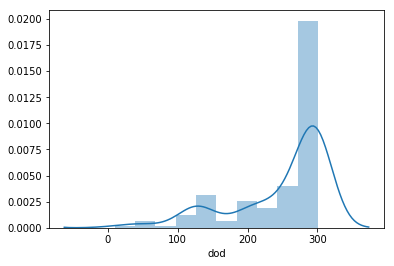

In [298]:
sns.distplot(data['dod'][data['dod'] < 305].dropna());

It seems that the current year is the year 305. Also it can be clearly seen that there were certain year with a high death rate. To proof the current year check if all that have a dod of 305 are still alive.

Furthermore there are certain years with high death rates - create new column called crisis

In [299]:
sum(((data['dod'] == 305) & (~data['dod'].isna())) & data['isAlive'][~data['dod'].isna()])

270

In [300]:
sum(data['dod'] == 305)

270

## Crisis

As described this indicated years with many deaths.

In [301]:
dod_vc = data['dod'].value_counts()[data['dod'].value_counts() > 4]

In [302]:
data['crisis'] = data['dod'].apply(lambda x: 1 if x in dod_vc.index else 0)

## dateOfBirth

This should be the year number around 0AD. Negative indicating BC.

In [303]:
data['dateOfBirth'].describe().round(2)

count       433.00
mean       1577.36
std       19565.41
min         -28.00
25%         240.00
50%         268.00
75%         285.00
max      298299.00
Name: dateOfBirth, dtype: float64

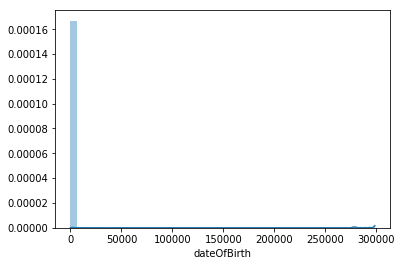

In [304]:
sns.distplot(data['dateOfBirth'].dropna());

Clearly there seems to be some errors: Some rows have 6-digit numbers here which would indicate two year numbers together.

Solution: keep only the last three digits.

In [305]:
data['dateOfBirth'] = data['dateOfBirth'].apply(lambda x: x if np.isnan(x)\
                                                else (int(str(x)[:3])\
                                                      if (len(str(x).split('.')[0]) > 3)\
                                                      else int(str(x).split('.')[0])))

## mother

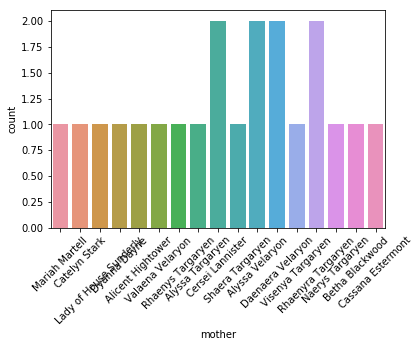

In [306]:
sns.countplot(x='mother', data=data);
plt.xticks(rotation=45);

Only a tiny number of data points have this information. Best drop it.

In [307]:
data = data.drop(['mother'],1)

## father

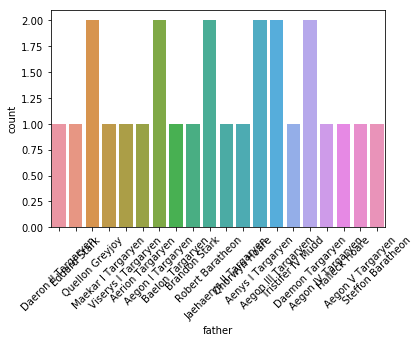

In [308]:
sns.countplot(x='father', data=data);
plt.xticks(rotation=45);

Only a tiny number of data points have this information. Best drop it.

In [309]:
data = data.drop(['father'],1)

## heir

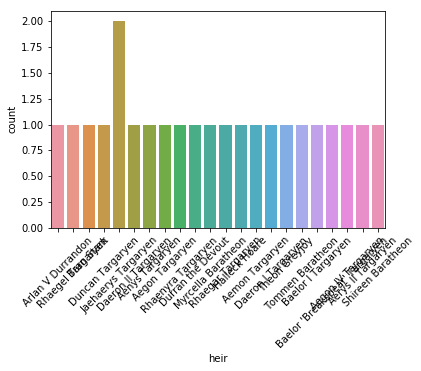

In [310]:
sns.countplot(x='heir', data=data);
plt.xticks(rotation=45);

Only a tiny number of data points have this information. Best drop it.

In [311]:
data = data.drop(['heir'],1)

## house

first fill NAs based on the name - the warining can be ignored in this case

In [312]:
for index, row in data.iterrows():
    # look for houses that are not set
    if pd.isna(row['house']):
        # extract and split the name
        name = row['name'].split()
        # go through the individual words of the name
        for x in name:
            x = ''.join(filter(str.isalpha, x))
            # is there a house name that matches the word?
            f = data['house'][data['house'].str.contains(x, na = False)]
            if not (f.empty):
                # found a matching house
                data['house'].iloc[index] = f.iloc[0]
                break

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


now fill the remaining NAs

In [313]:
data['house'] = data['house'].fillna('none')
data['house'] = data['house'].str.lower()
data['house'] = data['house'].apply(lambda x: x.replace('house ', ''))
data['house'] = data['house'].apply(lambda x: x.replace('house', ''))

In [314]:
data['house'].value_counts().head(30)

none                           336
night's watch                  107
frey                            99
stark                           80
targaryen                       70
lannister                       49
greyjoy                         44
tyrell                          38
martell                         31
osgrey                          21
brotherhood without banners     20
faith of the seven              17
baratheon                       16
hightower                       16
arryn                           16
bracken                         14
florent                         14
botley                          13
bolton                          13
tully                           12
ironmaker                       12
brave companions                12
velaryon                        11
whent                           11
lannister of casterly rock      11
mormont                         10
crakehall                       10
merryweather                    10
stone crows         

In [315]:
data['house'] = data['house'].replace({'lannister of casterly rock':'lannister'})

keep only the houses with the highest occurance

In [316]:
keepStr = data['house'].value_counts().head(30).index.tolist()
data['house'] = data['house'].apply(lambda x: x if x in keepStr else 'other')

needs encoding

In [317]:
dummies = pd.get_dummies(list(data['house']),
                         drop_first = True)
dummies = dummies.add_prefix('hou_')
data = pd.concat(
        [data.loc[:,:],
         dummies],
         axis = 1)

## spouse

Is a column like name. Drop

In [318]:
data = data.drop(['spouse'],1)

## book1_A_Game_Of_Thrones

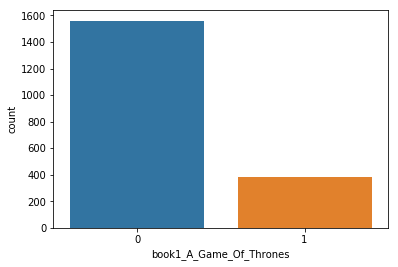

In [319]:
sns.countplot(x = 'book1_A_Game_Of_Thrones',
              data = data);

## book2_A_Clash_Of_Kings

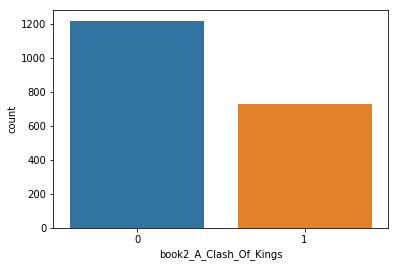

In [320]:
sns.countplot(x = 'book2_A_Clash_Of_Kings',
              data = data);

## book3_A_Storm_Of_Swords

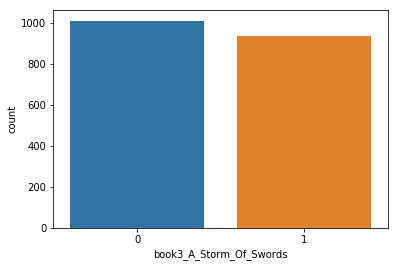

In [321]:
sns.countplot(x = 'book3_A_Storm_Of_Swords',
              data = data);

## book4_A_Feast_For_Crows

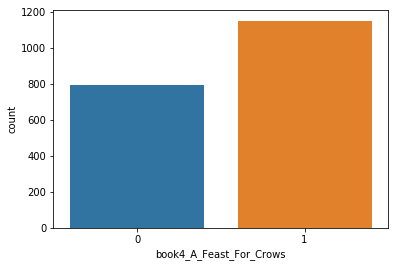

In [322]:
sns.countplot(x = 'book4_A_Feast_For_Crows',
              data = data);

## book5_A_Dance_with_Dragons

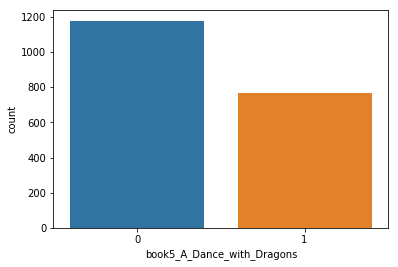

In [323]:
sns.countplot(x = 'book5_A_Dance_with_Dragons',
              data = data);

# number of books

In [324]:
data['numBooks'] = data['book5_A_Dance_with_Dragons'] \
                    + data['book4_A_Feast_For_Crows'] \
                    + data['book3_A_Storm_Of_Swords'] \
                    + data['book2_A_Clash_Of_Kings'] \
                    + data['book1_A_Game_Of_Thrones']

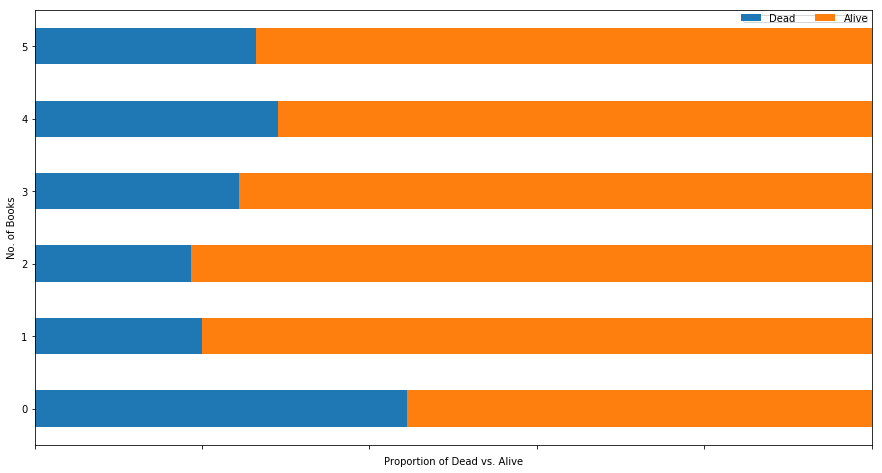

In [346]:
d = data.groupby(["numBooks", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
p = d.div(d.sum(axis = 1),
          axis = 0).plot.barh(stacked = True,
                              rot = 0,
                              figsize = (15, 8),
                              width = .5)
_ = p.set(xticklabels = "",
          xlim = [0, 1],
          ylabel = "No. of Books",
          xlabel = "Proportion of Dead vs. Alive"),
p.legend(["Dead", "Alive"],
         loc = "upper right",
         ncol = 2,
         borderpad = -.15)
plt.savefig('NumBooks Alive.png')
plt.show()

## isAliveMother

Only a tiny number of data points have this information. Fill NaN's with -1

In [341]:
data['isAliveMother'] = data['isAliveMother'].fillna(-1)

## isAliveFather

Only a tiny number of data points have this information. Fill NaN's with -1

In [327]:
data['isAliveFather'] = data['isAliveFather'].fillna(-1)

## isAliveHeir

Only a tiny number of data points have this information. Fill NaN's with -1

In [328]:
data['isAliveHeir'] = data['isAliveHeir'].fillna(-1)

## isAliveSpouse

Only a tiny number of data points have this information. Fill NaN's with -1

In [329]:
data['isAliveSpouse'] = data['isAliveSpouse'].fillna(-1)

## isMarried

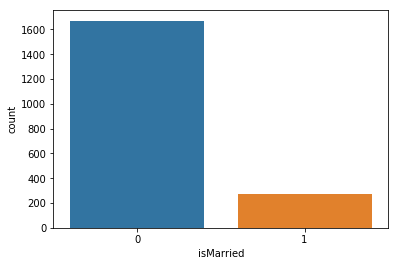

In [330]:
sns.countplot(x = 'isMarried',
              data = data);

## isNoble

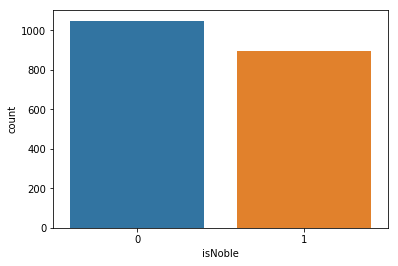

In [331]:
sns.countplot(x = 'isNoble',
              data = data);

## age

In [332]:
data['age'][(data['age'] < 0)]

110    -298001.0
1350   -277980.0
Name: age, dtype: float64

In [333]:
GOT_Data['dateOfBirth'][(GOT_Data['dateOfBirth'] > 999)]

110     298299.0
1350    278279.0
Name: dateOfBirth, dtype: float64

Obviously there are only two elements in both - age and date of birth, but they are in relation and still enable to calculate a date of death that is in the expected range. Therefor use the original values for date of death calculation and replace the age in accordance to the replaced date of birth and the date of death.

In [334]:
data['age'] = data['age'].where(data['age'] > 0, data['dod'] - data['dateOfBirth'])

In [335]:
data['age'].describe().round(2)

count    433.00
mean      36.70
std       25.83
min        0.00
25%       18.00
50%       27.00
75%       50.00
max      100.00
Name: age, dtype: float64

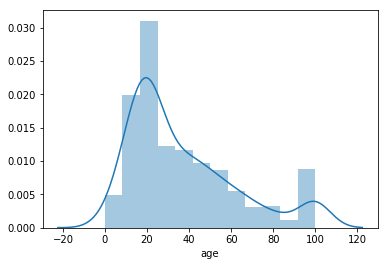

In [336]:
sns.distplot(data['age'].dropna());

add to date of birth and current year (in book) and the death column

## currentYear

In [337]:
data['currentYear'] = data['dod'] == 305

## numDeadRelations

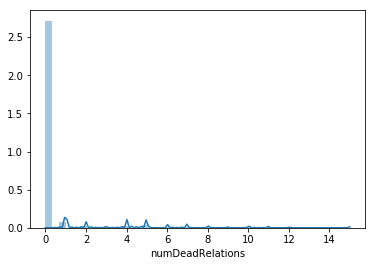

In [338]:
sns.distplot(data['numDeadRelations']);

## BoolDeadRelations

Create a new feature showing if someone has dead relations

In [339]:
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: np.nan if pd.isna(x) else (1 if x > 0 else 0))

Check if there is a relation between dead relations and being alive

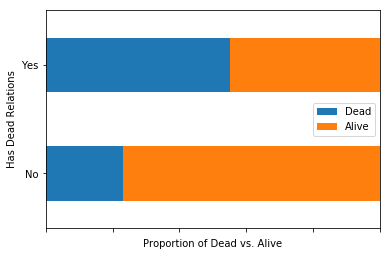

In [347]:
d = data.groupby(["boolDeadRelations", "isAlive"]).count()["S.No"].unstack().copy(deep = True)
p = d.div(d.sum(axis = 1),
          axis = 0).plot.barh(stacked = True,
                              rot = 0,
                              width = .5)
_ = p.set_xlim([0, 1]),
p.set(yticklabels = ["No", "Yes"],
      xticklabels = "",
      xlabel = "Proportion of Dead vs. Alive",
      ylabel = "Has Dead Relations"),
p.legend(["Dead", "Alive"])
plt.savefig('DeadRelations Alive.png')
plt.show()

## popularity

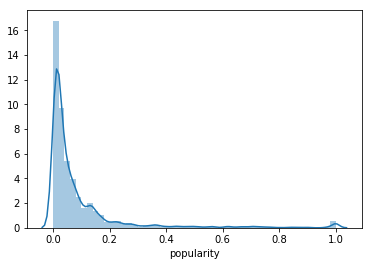

In [71]:
sns.distplot(data['popularity']);

## isAlive

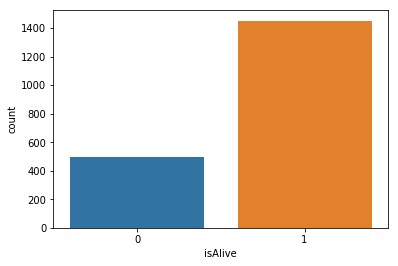

In [75]:
sns.countplot(x = 'isAlive',
              data = data);

## Drop not needed Columns

In [76]:
data = data.drop(['title',
                  'culture',
                  'house',
                  'name',
                  'S.No'], 1)

# Correlation

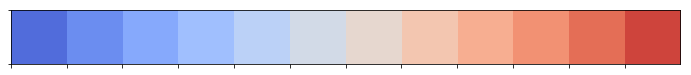

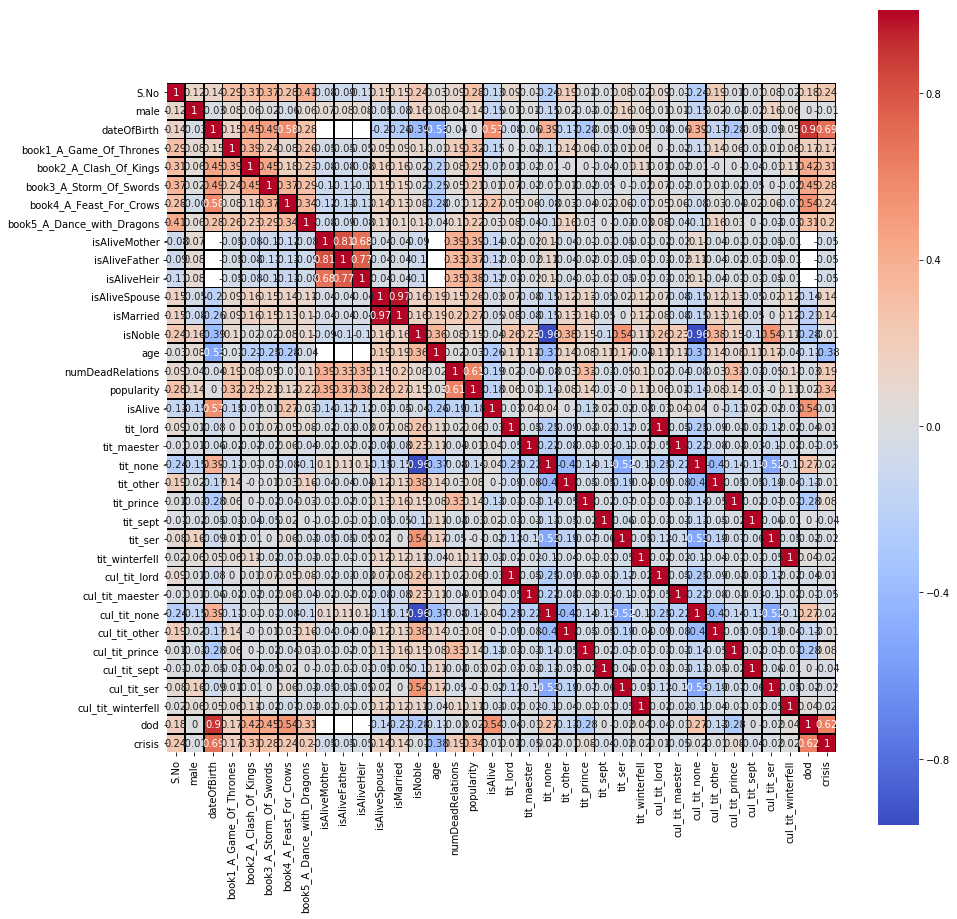

In [350]:
df_corr = data.corr().round(2).iloc[0:36, 0:36]
sns.palplot(sns.color_palette('coolwarm',
                              12))
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)
plt.show()

# Create Sets

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 68 columns):
male                               1946 non-null int64
dateOfBirth                        433 non-null float64
book1_A_Game_Of_Thrones            1946 non-null int64
book2_A_Clash_Of_Kings             1946 non-null int64
book3_A_Storm_Of_Swords            1946 non-null int64
book4_A_Feast_For_Crows            1946 non-null int64
book5_A_Dance_with_Dragons         1946 non-null int64
isAliveMother                      1946 non-null float64
isAliveFather                      1946 non-null float64
isAliveHeir                        1946 non-null float64
isAliveSpouse                      1946 non-null float64
isMarried                          1946 non-null int64
isNoble                            1946 non-null int64
age                                433 non-null float64
numDeadRelations                   1946 non-null int64
popularity                         1946 non-null float64
i

All good - no object columns left. The remaining NAN's can be safely ignored as XGBoost as well as H2O can handle missing values.

In [256]:
# attributes
X = data.drop(['isAlive'], 1)
# lables
y = data['isAlive']

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.1,
                                                    random_state = 508)

# XGBoost

First create baseline model

In [217]:
xg_reg = xgb.XGBClassifier(objective = 'binary:logistic',
                          max_depth = 3,
                          n_estimators = 150,
                          learning_rate = 0.3,
                          min_child_weight = 1.0,
                          gamma = 0,
                          subsample = 1.0,
                          colsample_bytree = 1,
                          eval_metric = 'auc',
                          scale_pos_weight = 1.0,
                          reg_alpha = 0.0,
                          reg_lambda = 1.0).fit(X_train,
                                                y_train)

In [218]:
score = xg_reg.score(X_test,
                     y_test)
train_score = xg_reg.score(X_train,
                           y_train)
diff = train_score - score

print("Testing score: %f" % (score))
print("Training score: %f" % (train_score))
print("Diff: %f" % (diff))

Testing score: 0.871795
Training score: 0.913764
Diff: 0.041969


now improve the hyperparameters

In [87]:
param_grid = {'max_depth' : pd.np.arange(2, 6, 1),
              'n_estimators' : pd.np.arange(100, 300, 10),
              'learning_rate' : pd.np.arange(0.1, 0.5, 0.1)}
xg_reg2 = xgb.XGBClassifier(objective = 'binary:logistic',
                            eta = 0.1)

In [88]:
xg_cv = GridSearchCV(xg_reg2,
                     param_grid,
                     cv = 3).fit(X_train,
                                 y_train)

In [89]:
xg_cv.best_score_

0.8595088520845231

In [90]:
xg_cv.best_params_

{'learning_rate': 0.30000000000000004, 'max_depth': 3, 'n_estimators': 170}

Use the improved hyperparameters as starting point and manually optimize

In [219]:
xg_reg = xgb.XGBClassifier(objective = 'binary:logistic',
                          max_depth = 3,
                          n_estimators = 320,
                          learning_rate = 0.25,
                          min_child_weight = 1.0,
                          gamma = 0.0,
                          subsample = 1.0,
                          colsample_bytree = 0.9,
                          eval_metric = 'auc',
                          scale_pos_weight = 1.0,
                          reg_alpha = 0.9,
                          reg_lambda = 1.0).fit(X_train,
                                                y_train)


In [220]:
score = xg_reg.score(X_test,
                     y_test)
train_score = xg_reg.score(X_train,
                           y_train)
diff = train_score - score

print("Testing score: %f" % (score))
print("Training score: %f" % (train_score))
print("Diff: %f" % (diff))

Testing score: 0.902564
Training score: 0.920046
Diff: 0.017482


Testing AUC of 0.9025 is pretty ok...

calculate AUC using the predicted probabilities

In [221]:
y_pred_test = xg_reg.predict_proba(X_test)[:,1]
y_pred_train = xg_reg.predict_proba(X_train)[:,1]

In [239]:
y_pred_test_n = xg_reg.predict(X_test)

Create the prediction outputs

In [247]:
output = pd.concat([pd.DataFrame(list(y_test)),
         pd.DataFrame(y_pred_test_n),
         pd.DataFrame(y_pred_test)],
         axis = 1)
output.columns = ['Actual',
                  'Predicted',
                  'Prediction Probability']

In [267]:
output.to_excel('output.xlsx')

Let's cross validate

In [263]:
xg_cv = cross_val_score(xg_reg,
                        X,
                        y,
                        scoring = 'roc_auc',
                        cv = 5)

In [264]:
print(pd.np.mean(xg_cv))

0.8951701635384536


In [265]:
print(pd.np.max(xg_cv))

0.908098223615465


In [266]:
print(pd.np.min(xg_cv))

0.8838209683037269


Actually the AUC scores from the probabbilities should be more accurate

In [222]:
roc_auc_score(y_test,
              y_pred_test)

0.9071724137931034

In [223]:
roc_auc_score(y_train,
              y_pred_train)

0.9609408606775987

I don't fully understand the discrepancies in the AUC values. But as the score is better...

## Feature importance

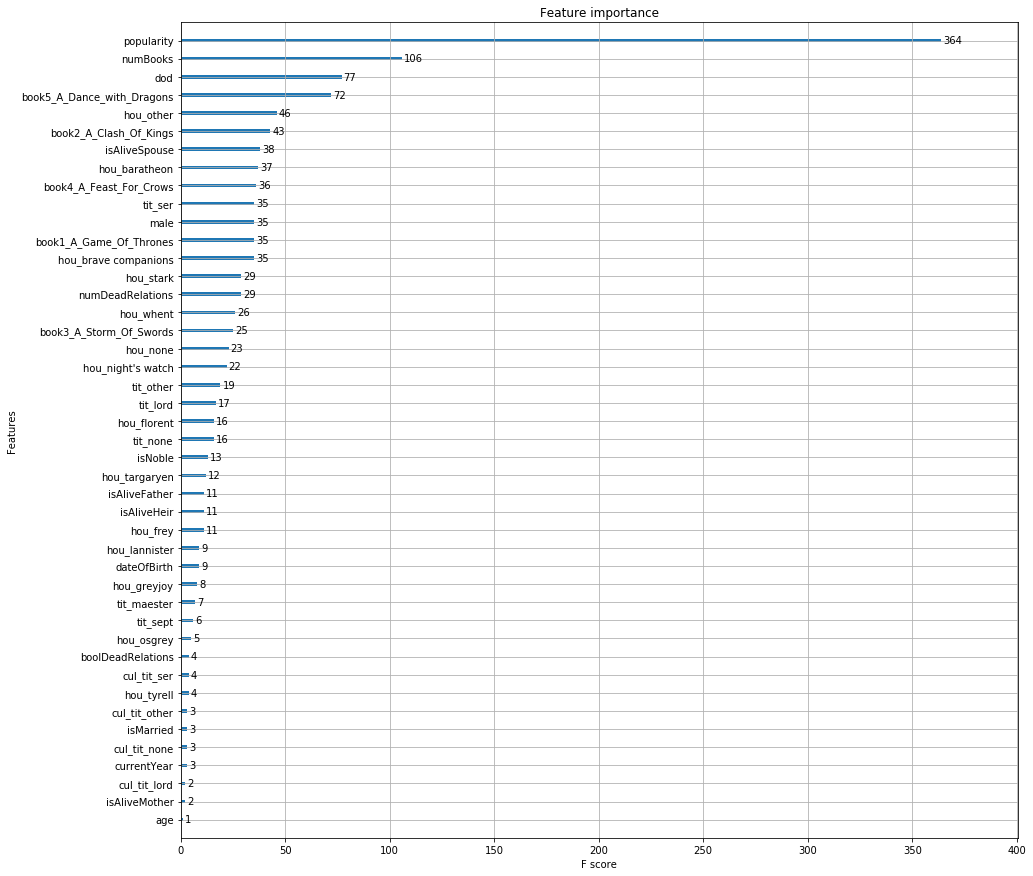

In [353]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15,
                                  15]
plt.savefig('XGB FeatureImp.png')
plt.show()

## Shapley values

In [360]:
shap_explainer = shap.TreeExplainer(xg_reg)
shap_values = shap_explainer.shap_values(X_test)

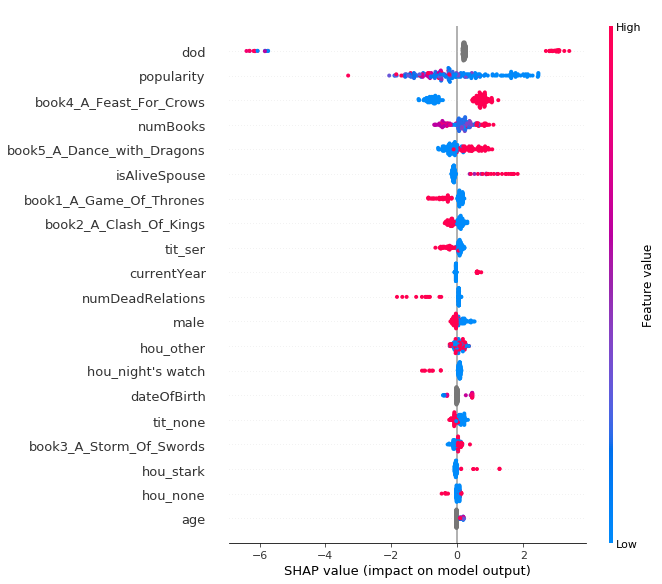

In [354]:
shap.summary_plot(shap_values,
                  X_test,
                  show = False)
plt.savefig('Shap Summary.png')
plt.show()

Now look more closely into some interactions

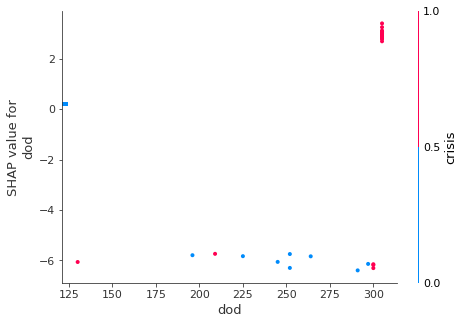

In [366]:
shap.dependence_plot("dod",
                     shap_values,
                     display_features = X_test,
                     features = X_test,
                     interaction_index = 'crisis',
                     show = False)
plt.savefig('Shap dod crisis.png')
plt.show()

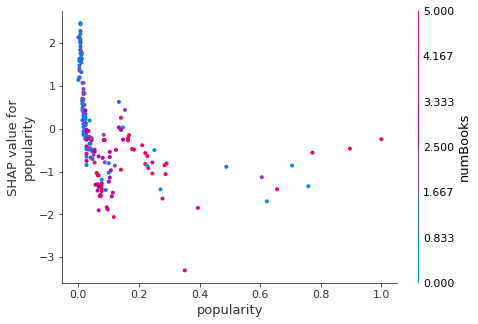

In [369]:
shap.dependence_plot("popularity",
                     shap_values,
                     display_features = X_test,
                     features = X_test,
                     interaction_index = 'numBooks',
                     show = False)
plt.savefig('Shap popularity numBooks.png')
plt.show()

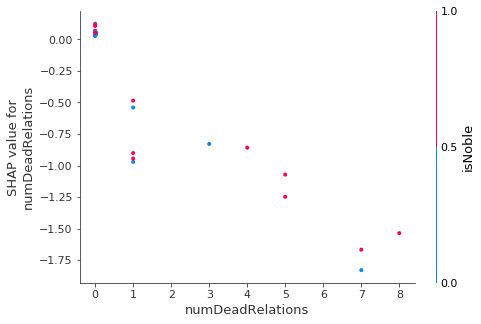

In [376]:
shap.dependence_plot("numDeadRelations",
                     shap_values,
                     display_features = X_test,
                     features = X_test,
                     interaction_index = 'isNoble',
                     show = False)
plt.savefig('Shap numDeadRelations.png')
plt.show()

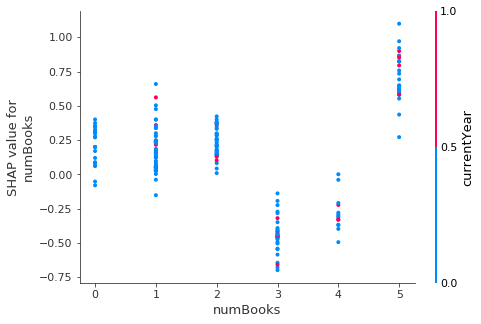

In [375]:
shap.dependence_plot("numBooks",
                     shap_values,
                     display_features = X_test,
                     features = X_test,
                     interaction_index = 'currentYear',
                     show = False)
plt.savefig('Shap numBooks.png')
plt.show()

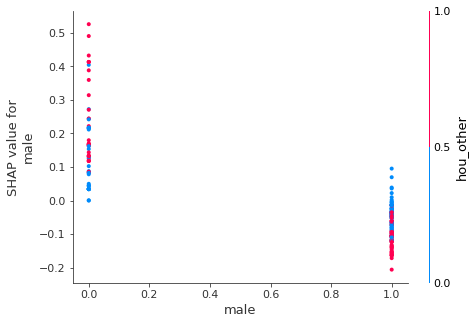

In [379]:
shap.dependence_plot("male",
                     shap_values,
                     display_features = X_test,
                     features = X_test,
                  #   interaction_index = 'currentYear',
                     show = False)
plt.savefig('Shap book4_A_Feast_For_Crows.png')
plt.show()

Plot an example tree - plotting all of them doesn't make any sense given there are ~320

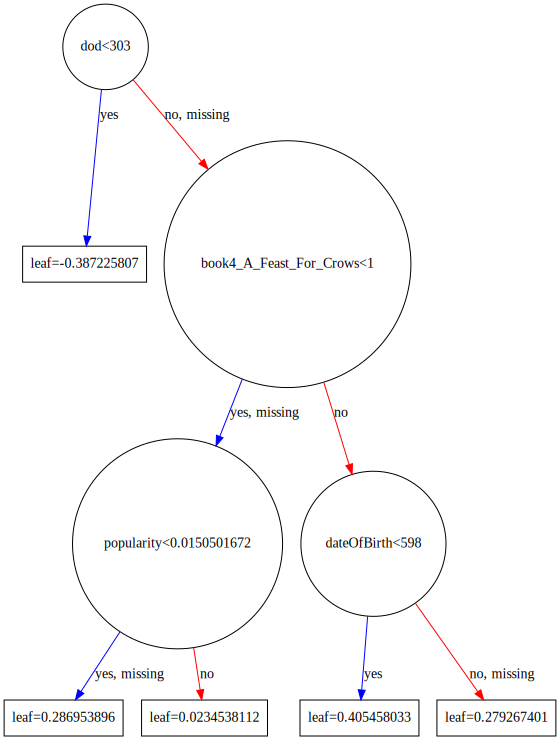

In [356]:
xgb.to_graphviz(xg_reg,
                num_trees = 1)

# H2O

In [228]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,4 days 2 hours 59 mins
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.4
H2O cluster version age:,1 month and 2 days
H2O cluster name:,H2O_from_python_marcus_i0iols
H2O cluster total nodes:,1
H2O cluster free memory:,3.991 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [231]:
h_data = h2o.H2OFrame(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [232]:
y2 = "isAlive"
x2 = data.columns.values.tolist()
x2.remove(y2)
h_data[y2] = h_data[y2].asfactor()

aml = H2OAutoML(max_models = 15,
                seed = 508,
                nfolds = 5)
aml.train(x = x2,
          y = y2,
          training_frame = h_data)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [233]:
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_grid_1_AutoML_20190318_135253_model_2,0.900269,0.327334,0.214709,0.3171,0.100552
StackedEnsemble_AllModels_AutoML_20190318_135253,0.898719,0.327147,0.246036,0.315441,0.0995033
StackedEnsemble_BestOfFamily_AutoML_20190318_135253,0.898608,0.327377,0.237658,0.314496,0.0989077
GBM_1_AutoML_20190318_135253,0.898592,0.320251,0.233438,0.315655,0.0996379
XGBoost_1_AutoML_20190318_135253,0.898389,0.321526,0.233736,0.317036,0.100512
GBM_4_AutoML_20190318_135253,0.896989,0.322884,0.22203,0.316358,0.100083
GBM_3_AutoML_20190318_135253,0.896901,0.322741,0.23906,0.316107,0.0999238
GBM_2_AutoML_20190318_135253,0.896147,0.324048,0.23408,0.317705,0.100937
XGBoost_2_AutoML_20190318_135253,0.895041,0.332797,0.2378,0.320898,0.102976
XGBoost_grid_1_AutoML_20190318_135253_model_1,0.893155,0.331541,0.229398,0.32116,0.103144


AutoML also gives me an AUC of over 90%

In [234]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


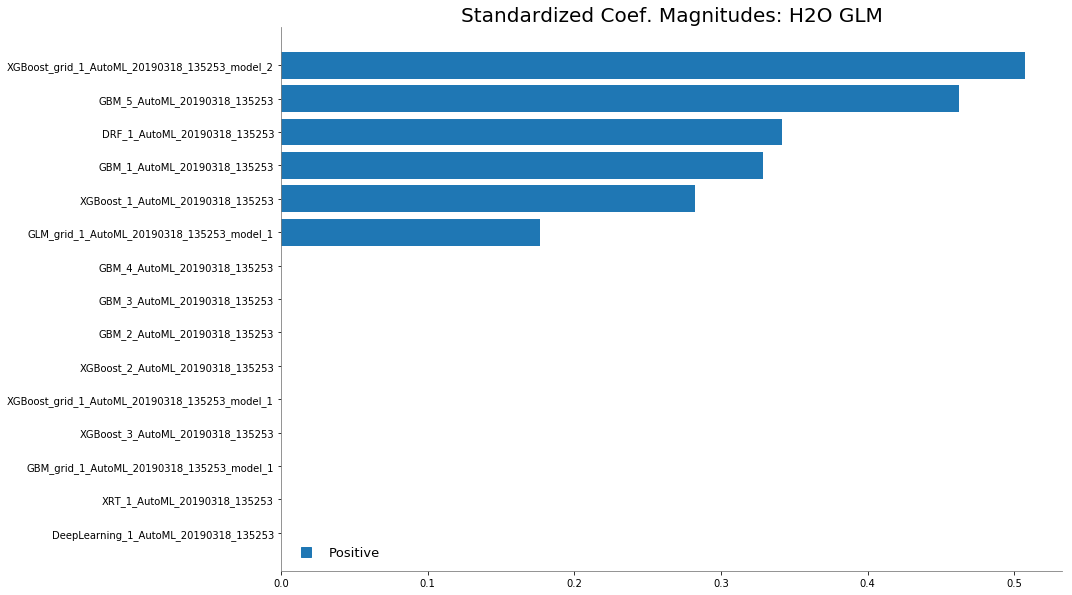

In [235]:
metalearner.std_coef_plot()

In [236]:
aml.leader.download_mojo(path = "./")

'/Users/marcus/Desktop/ML/A2/ML-GoT/XGBoost_grid_1_AutoML_20190318_135253_model_2.zip'

In [237]:
h2o.shutdown

<function h2o.h2o.deprecated.<locals>.deprecated_decorator.<locals>.decorator_invisible(*args, **kwargs)>